In [1]:
import pandas as pd
#Load the dataset
ds=pd.read_csv(r'C:\Users\KAVYA\Downloads\Big_Black_Money_Dataset.csv')
#Display the dataset
print(ds.head())

  Transaction ID       Country  Amount (USD)   Transaction Type  \
0   TX0000000001        Brazil  3.267530e+06  Offshore Transfer   
1   TX0000000002         China  4.965767e+06    Stocks Transfer   
2   TX0000000003            UK  9.416750e+04    Stocks Transfer   
3   TX0000000004           UAE  3.864201e+05    Cash Withdrawal   
4   TX0000000005  South Africa  6.433784e+05     Cryptocurrency   

   Date of Transaction Person Involved      Industry Destination Country  \
0  2013-01-01 00:00:00     Person_1101  Construction                 USA   
1  2013-01-01 01:00:00     Person_7484  Luxury Goods        South Africa   
2  2013-01-01 02:00:00     Person_3655  Construction         Switzerland   
3  2013-01-01 03:00:00     Person_3226     Oil & Gas              Russia   
4  2013-01-01 04:00:00     Person_7975   Real Estate                 USA   

   Reported by Authority Source of Money  Money Laundering Risk Score  \
0                   True         Illegal                           

In [2]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [3]:
print(ds.describe())

       Amount (USD)  Money Laundering Risk Score  Shell Companies Involved
count  1.000000e+04                 10000.000000              10000.000000
mean   2.501818e+06                     5.526400                  4.469400
std    1.424364e+06                     2.893603                  2.879773
min    1.003180e+04                     1.000000                  0.000000
25%    1.279005e+06                     3.000000                  2.000000
50%    2.501310e+06                     6.000000                  4.000000
75%    3.722416e+06                     8.000000                  7.000000
max    4.999812e+06                    10.000000                  9.000000


In [4]:
print(ds.isnull().sum())

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64


In [5]:
ds['Amount (USD)'].fillna(ds['Amount (USD)'].median(), inplace=True)


ds.dropna(subset=['Transaction Type'], inplace=True)


C:\Users\KAVYA\AppData\Local\Temp\ipykernel_50196\4079574209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Amount (USD)'].fillna(ds['Amount (USD)'].median(), inplace=True)


In [6]:
ds['Transaction Type'] = ds['Transaction Type'].astype('category').cat.codes
ds['country'] = ds['Destination Country'].astype('category').cat.codes


In [7]:
print(ds.columns)

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country', 'country'],
      dtype='object')


In [8]:
import numpy as np
from scipy import stats
# Calculate Z-scores
z_scores= stats.zscore(ds.select_dtypes(include=['float64','int64']))
abs_z_scores=np.abs(z_scores)
outliers=(abs_z_scores>3).all(axis=1)
dss_outliers=ds[outliers]
print(dss_outliers)

Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country, country]
Index: []


In [9]:
from sklearn.neighbors import LocalOutlierFactor
# Fit the model
lof=LocalOutlierFactor(n_neighbors=20)
loutliers=lof.fit_predict(ds.select_dtypes(include=['float64','int64']))
dsl_outliers=ds[outliers==-1]
# Display the outliers
print(dsl_outliers)

Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country, country]
Index: []


In [10]:
from sklearn.ensemble import IsolationForest
# Fit the model
iso_forest=IsolationForest(contamination=0.1)
ioutliers=iso_forest.fit_predict(ds.select_dtypes(include=['float64','int64']))
dsi_outliers=ds[outliers==-1]
# Display the outliers
print(dsi_outliers)

Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country, country]
Index: []


In [11]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters=dbscan.fit_predict(ds.select_dtypes(include=['float64','int64']))
dsd_outliers=ds[clusters==-1]
print(dsd_outliers)

     Transaction ID       Country  Amount (USD)  Transaction Type  \
0      TX0000000001        Brazil  3.267530e+06                 2   
1      TX0000000002         China  4.965767e+06                 4   
2      TX0000000003            UK  9.416750e+04                 4   
3      TX0000000004           UAE  3.864201e+05                 0   
4      TX0000000005  South Africa  6.433784e+05                 1   
...             ...           ...           ...               ...   
9995   TX0000009996     Singapore  2.209229e+06                 2   
9996   TX0000009997           UAE  4.800338e+06                 3   
9997   TX0000009998            UK  4.891953e+05                 4   
9998   TX0000009999        Brazil  2.233581e+06                 2   
9999   TX0000010000   Switzerland  3.846778e+05                 4   

      Date of Transaction Person Involved      Industry Destination Country  \
0     2013-01-01 00:00:00     Person_1101  Construction                 USA   
1     2013-01

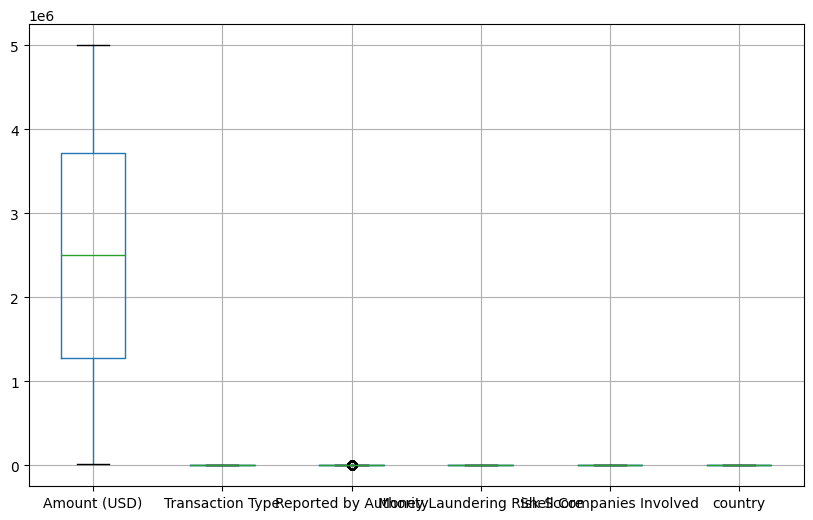

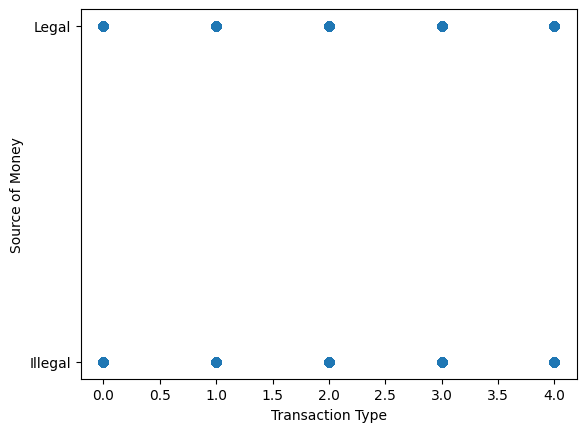

In [12]:
import matplotlib.pyplot as plt
# Box plot
ds.boxplot(figsize=(10, 6))
plt.show()
# Scatter plot
plt.scatter(ds['Transaction Type'],ds['Source of Money'])
plt.xlabel('Transaction Type')
plt.ylabel('Source of Money')
plt.show()

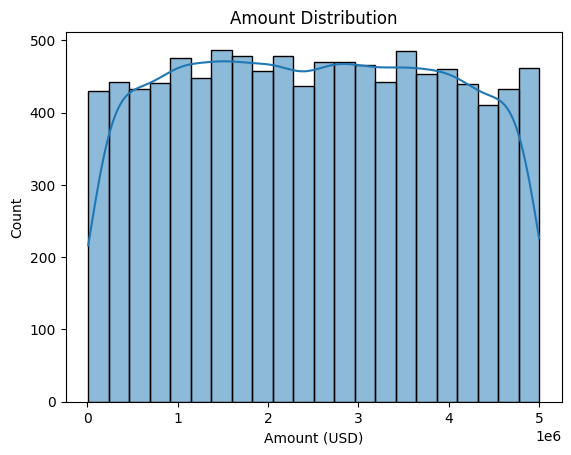

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(ds['Amount (USD)'],kde=True)
plt.title('Amount Distribution')
plt.show()

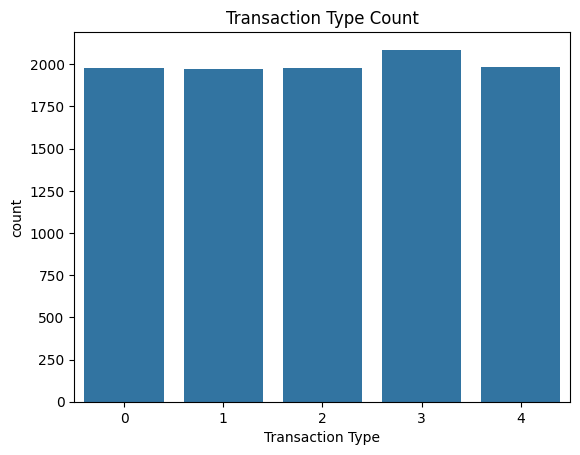

In [14]:
sns.countplot(x='Transaction Type',data=ds)
plt.title('Transaction Type Count')
plt.show()

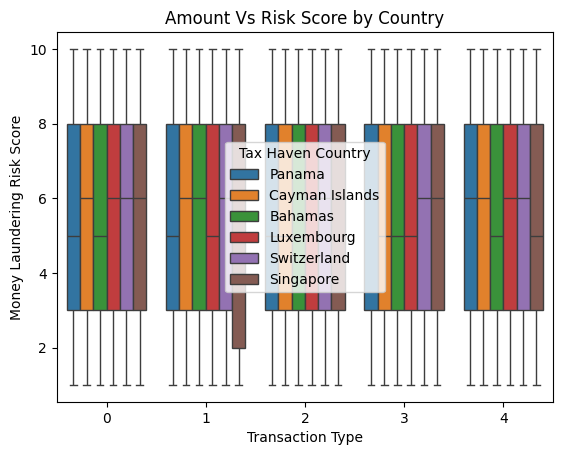

In [15]:
sns.boxplot(x='Transaction Type',y='Money Laundering Risk Score',hue='Tax Haven Country',data=ds)
plt.title("Amount Vs Risk Score by Country")
plt.show()

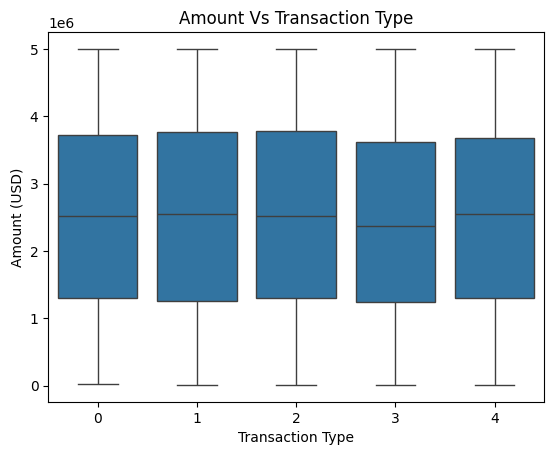

In [16]:
sns.boxplot(x='Transaction Type',y='Amount (USD)',data=ds)
plt.title('Amount Vs Transaction Type')
plt.show()

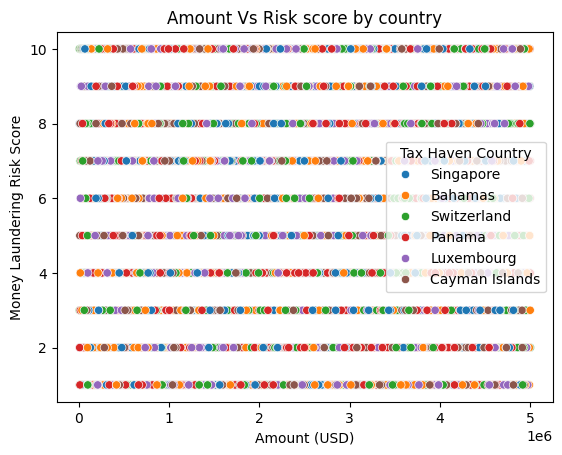

In [17]:
sns.scatterplot(x='Amount (USD)',y='Money Laundering Risk Score',hue='Tax Haven Country',data=ds)
plt.title('Amount Vs Risk score by country')
plt.show()

In [18]:
print(ds.dtypes)

Transaction ID                  object
Country                         object
Amount (USD)                   float64
Transaction Type                  int8
Date of Transaction             object
Person Involved                 object
Industry                        object
Destination Country             object
Reported by Authority             bool
Source of Money                 object
Money Laundering Risk Score      int64
Shell Companies Involved         int64
Financial Institution           object
Tax Haven Country               object
country                           int8
dtype: object


In [19]:
ds['Amount (USD)']=pd.to_numeric(ds['Amount (USD)'],errors='coerce')
ds['Money Laundering Risk Score']=pd.to_numeric(ds['Money Laundering Risk Score'],errors='coerce')
ds['Date of Transaction']=pd.to_datetime(ds['Date of Transaction'],errors='coerce')

In [20]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for simplicity
label_encoder=LabelEncoder()
ds['Transaction Type']=label_encoder.fit_transform(ds['Transaction Type'])
ds['Tax Haven Country']=label_encoder.fit_transform(ds['Tax Haven Country'])
ds['Destination Country']=label_encoder.fit_transform(ds['Destination Country'])
ds['Industry']=label_encoder.fit_transform(ds['Industry'])
ds['Source of Money']=label_encoder.fit_transform(ds['Source of Money'])

In [21]:
numeric_ds=ds.select_dtypes(include=[float,int])

In [22]:
# Print DataFrame
print(ds.head())

# Check data types
print(ds.dtypes)

# Summary statistics
print(ds.describe())

# Check for NaN values
print(ds.isnull().sum())


  Transaction ID       Country  Amount (USD)  Transaction Type  \
0   TX0000000001        Brazil  3.267530e+06                 2   
1   TX0000000002         China  4.965767e+06                 4   
2   TX0000000003            UK  9.416750e+04                 4   
3   TX0000000004           UAE  3.864201e+05                 0   
4   TX0000000005  South Africa  6.433784e+05                 1   

  Date of Transaction Person Involved  Industry  Destination Country  \
0 2013-01-01 00:00:00     Person_1101         2                    9   
1 2013-01-01 01:00:00     Person_7484         4                    5   
2 2013-01-01 02:00:00     Person_3655         2                    6   
3 2013-01-01 03:00:00     Person_3226         5                    3   
4 2013-01-01 04:00:00     Person_7975         6                    9   

   Reported by Authority  Source of Money  Money Laundering Risk Score  \
0                   True                0                            6   
1                  Fal

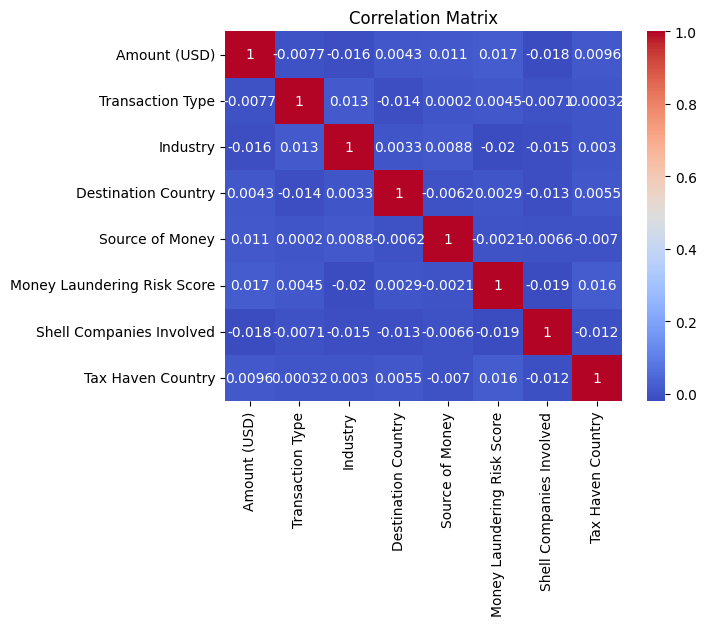

In [23]:
sns.heatmap(numeric_ds.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

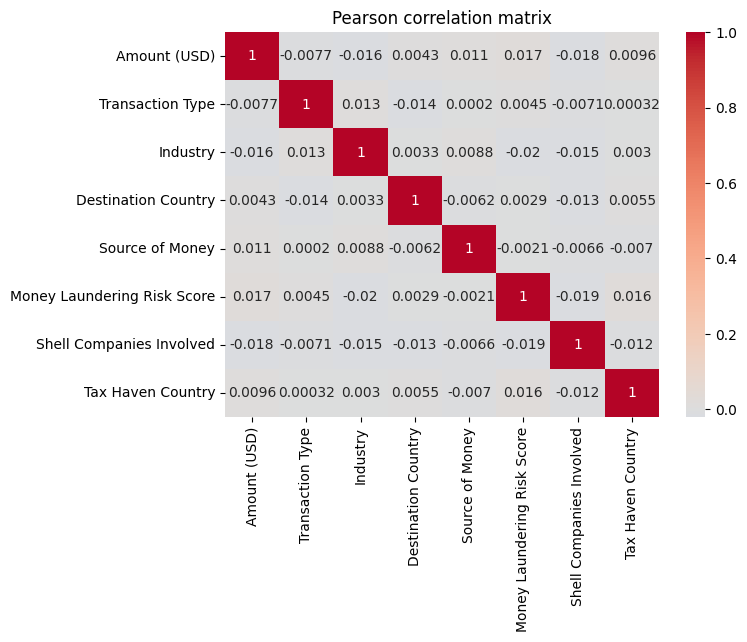

In [24]:
#calculate Pearson correlation matrix
pearson=numeric_ds.corr(method='pearson')
#plot Pearson correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(pearson,annot=True,cmap='coolwarm',center=0)
plt.title('Pearson correlation matrix')
plt.show()

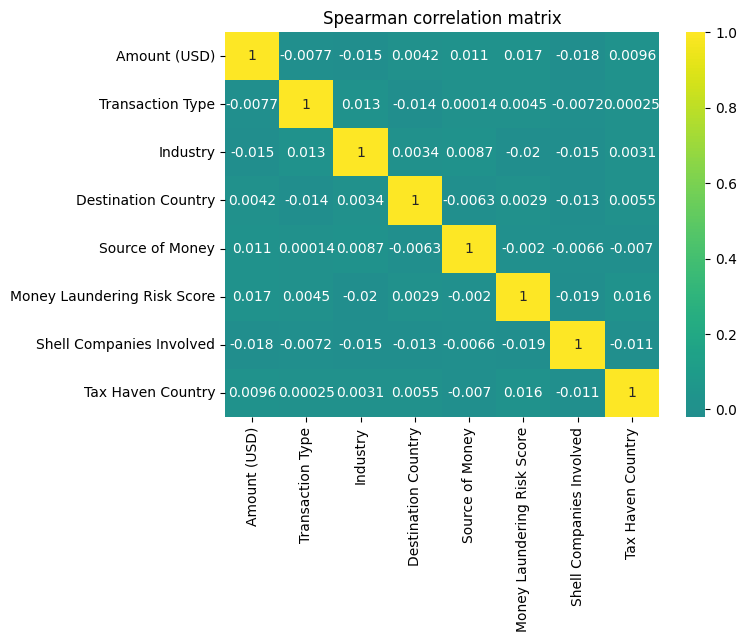

In [25]:
#calculate Spearman correlation matrix
spearman=numeric_ds.corr(method='spearman')
#plot Pearson correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(spearman,annot=True,cmap='viridis',center=0)
plt.title('Spearman correlation matrix')
plt.show()

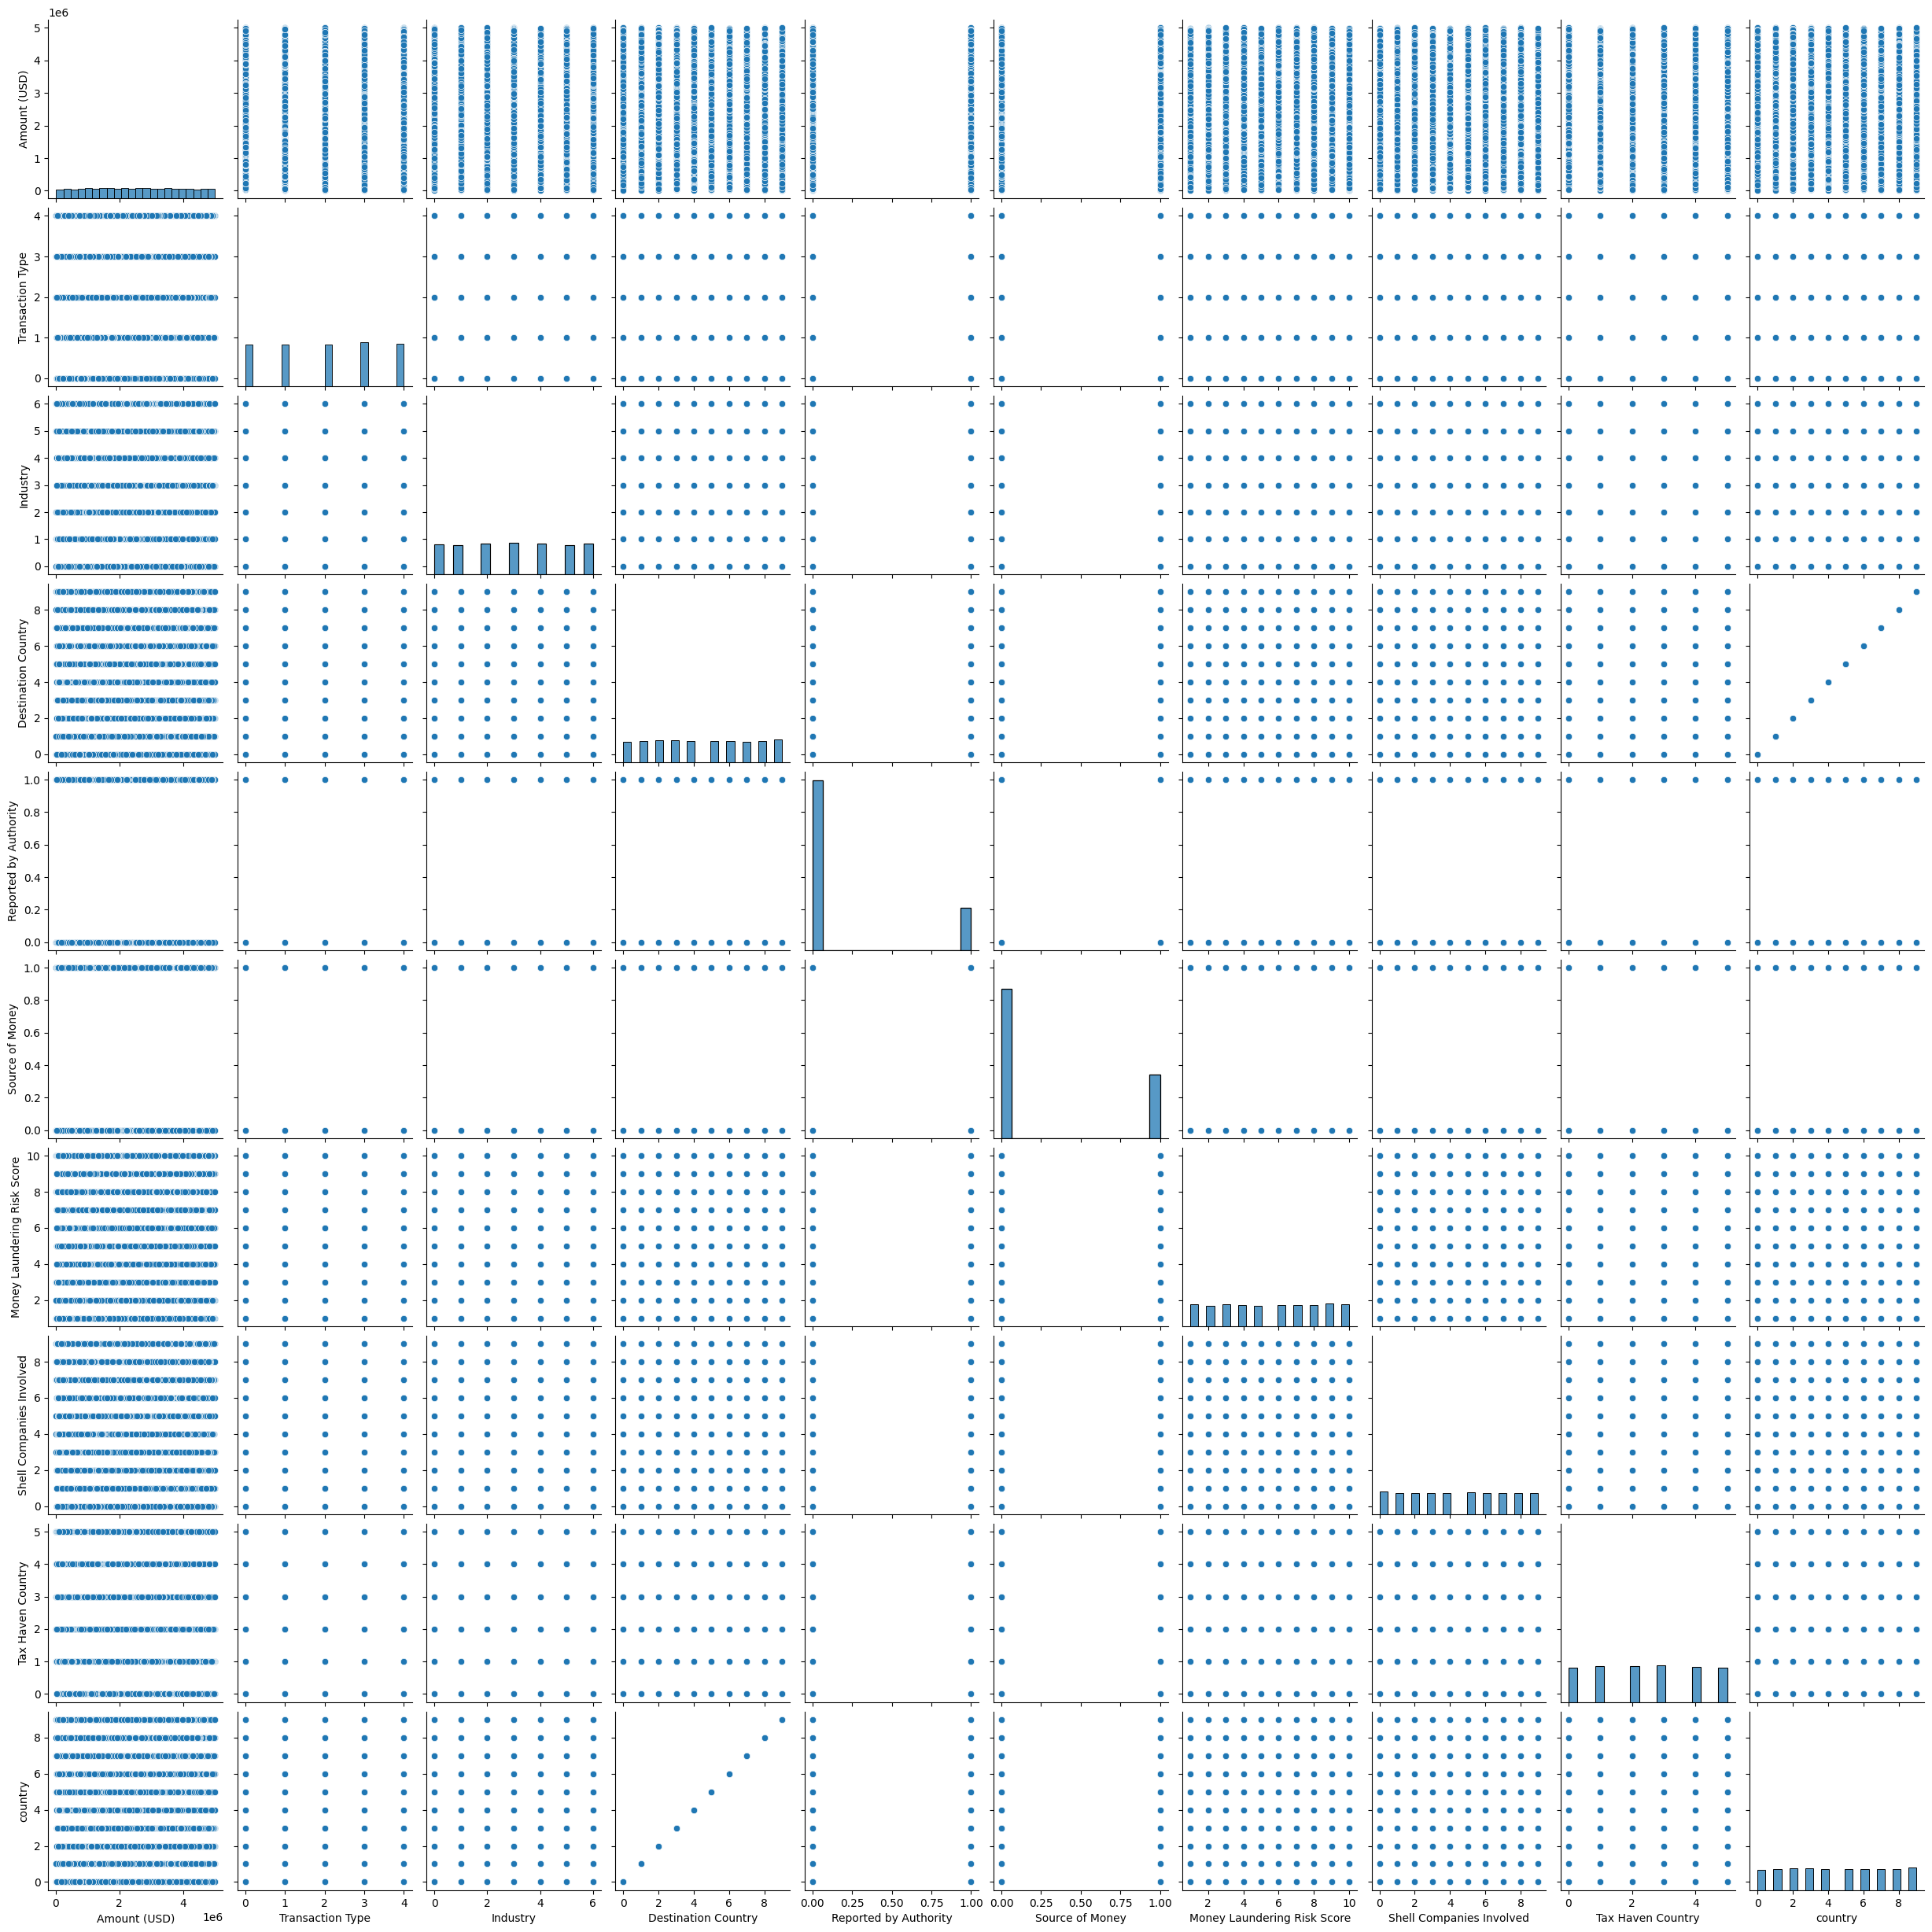

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(ds)
plt.show()

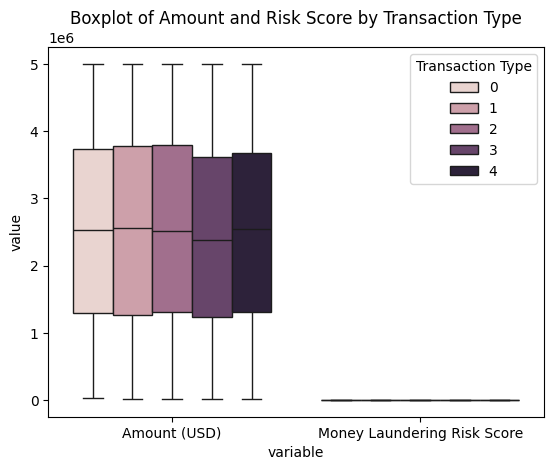

In [27]:
mul_fts=['Amount (USD)','Money Laundering Risk Score']
ds_melted=ds.melt(id_vars='Transaction Type',value_vars=mul_fts)
sns.boxplot(x='variable',y='value',hue='Transaction Type',data=ds_melted)
plt.title('Boxplot of Amount and Risk Score by Transaction Type')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
features=['Amount (USD)','Money Laundering Risk Score']
scaler=StandardScaler()
ds[features]=scaler.fit_transform(ds[features])
ds_encoded=pd.get_dummies(ds,drop_first=True)
print(ds[features])
print(ds_encoded)


      Amount (USD)  Money Laundering Risk Score
0         0.537609                     0.163680
1         1.729945                     1.200501
2        -1.690418                    -1.564356
3        -1.485226                     0.509287
4        -1.304815                    -1.564356
...            ...                          ...
9995     -0.205428                    -0.527535
9996      1.613797                     1.546108
9997     -1.413068                    -0.181928
9998     -0.188330                     1.546108
9999     -1.486450                    -0.181928

[10000 rows x 2 columns]
      Amount (USD)  Transaction Type Date of Transaction  Industry  \
0         0.537609                 2 2013-01-01 00:00:00         2   
1         1.729945                 4 2013-01-01 01:00:00         4   
2        -1.690418                 4 2013-01-01 02:00:00         2   
3        -1.485226                 0 2013-01-01 03:00:00         5   
4        -1.304815                 1 2013-01-01 

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler=StandardScaler()
ds_scaled=scaler.fit_transform(ds[features])
print(ds_scaled)


[[ 0.53760903  0.16367955]
 [ 1.72994528  1.20050099]
 [-1.69041767 -1.5643562 ]
 ...
 [-1.41306761 -0.1819276 ]
 [-0.18833002  1.54610814]
 [-1.48644958 -0.1819276 ]]


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(ds[features])
score=silhouette_score(ds[features],clusters)
print(f'silhouette score:{score}')

silhouette score:0.37487591175327906


In [31]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(ds[features])
print(f'k-means:{clusters}')   #print cluster labels

k-means:[0 2 1 ... 1 2 1]


In [32]:
#Silhouette score
from sklearn.metrics import silhouette_score
score=silhouette_score(ds[features],clusters)
print(f'silhouette score:{score}')

silhouette score:0.37487591175327906


In [33]:
ds['Cluster']=clusters  #Add cluster labels to Dataframe
print(ds.head())
print(ds.info())

  Transaction ID       Country  Amount (USD)  Transaction Type  \
0   TX0000000001        Brazil      0.537609                 2   
1   TX0000000002         China      1.729945                 4   
2   TX0000000003            UK     -1.690418                 4   
3   TX0000000004           UAE     -1.485226                 0   
4   TX0000000005  South Africa     -1.304815                 1   

  Date of Transaction Person Involved  Industry  Destination Country  \
0 2013-01-01 00:00:00     Person_1101         2                    9   
1 2013-01-01 01:00:00     Person_7484         4                    5   
2 2013-01-01 02:00:00     Person_3655         2                    6   
3 2013-01-01 03:00:00     Person_3226         5                    3   
4 2013-01-01 04:00:00     Person_7975         6                    9   

   Reported by Authority  Source of Money  Money Laundering Risk Score  \
0                   True                0                     0.163680   
1                  Fal

In [34]:
print(kmeans.cluster_centers_)

[[ 0.94576272 -0.61623945]
 [-0.90684293 -0.66641236]
 [-0.00272493  1.04582748]]


In [35]:
from sklearn.decomposition import PCA
# Apply PCA
pca=PCA(n_components=2) # Reduce to 2 dimensions for visualization
ds_pca=pca.fit_transform(ds_scaled)
# Create a DataFrame with the PCA results
ds_pca=pd.DataFrame(ds_pca,columns=['PCA1','PCA2'])
# Display the PCA results
print(ds_pca.head())

       PCA1      PCA2
0  0.495886 -0.264408
1  2.072138 -0.374374
2 -2.301473  0.089139
3 -0.690094  1.410334
4 -2.028811 -0.183523


In [36]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne=TSNE(n_components=2,random_state=42)
ds_tsne=tsne.fit_transform(ds_scaled)
# Create a DataFrame with the t-SNE results
ds_tsne=pd.DataFrame(ds_tsne,columns=['t-SNE1','t-SNE2'])
# Display the t-SNE results
print(ds_tsne.head())

       t-SNE1     t-SNE2
0   21.485220  12.531138
1   96.180550  21.467402
2 -103.154541  -2.627582
3  -29.596172 -59.902752
4  -94.877968  11.975901


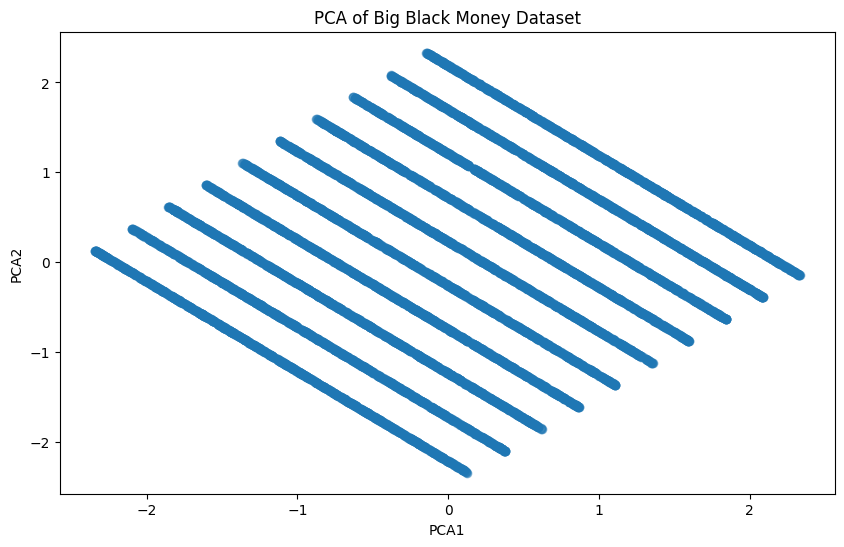

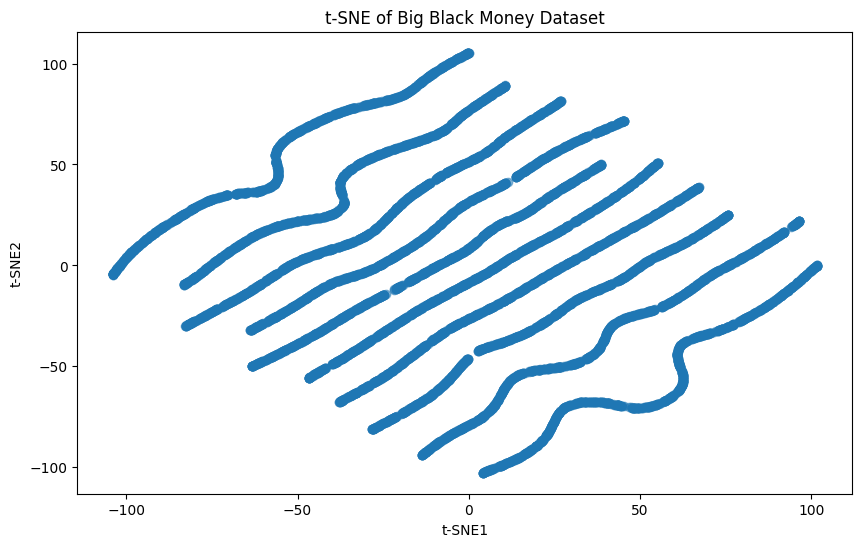

In [37]:
import matplotlib.pyplot as plt
# PCA Visualization
plt.figure(figsize=(10,6))
plt.scatter(ds_pca['PCA1'],ds_pca['PCA2'],alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Big Black Money Dataset')
plt.show()
# t-SNE Visualization
plt.figure(figsize=(10, 6))
plt.scatter(ds_tsne['t-SNE1'],ds_tsne['t-SNE2'],alpha=0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE of Big Black Money Dataset')
plt.show()

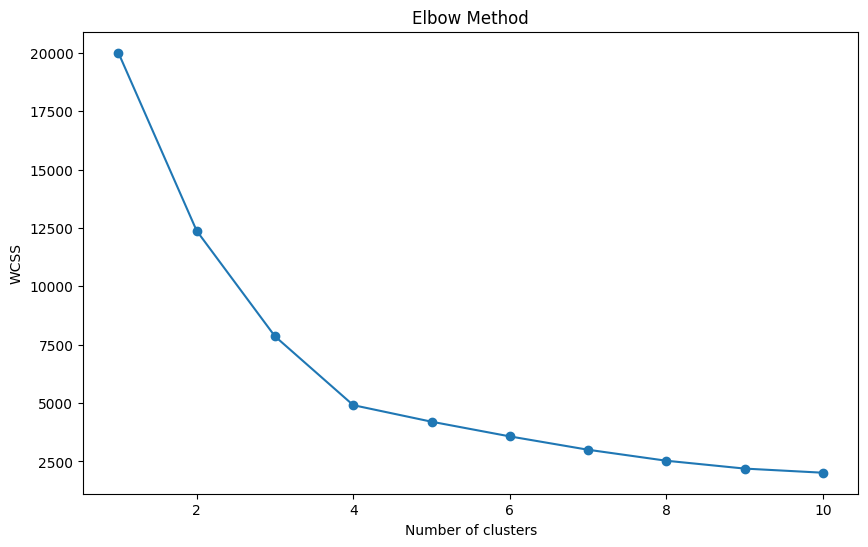

  Transaction ID       Country  Amount (USD)  Transaction Type  \
0   TX0000000001        Brazil      0.537609                 2   
1   TX0000000002         China      1.729945                 4   
2   TX0000000003            UK     -1.690418                 4   
3   TX0000000004           UAE     -1.485226                 0   
4   TX0000000005  South Africa     -1.304815                 1   

  Date of Transaction Person Involved  Industry  Destination Country  \
0 2013-01-01 00:00:00     Person_1101         2                    9   
1 2013-01-01 01:00:00     Person_7484         4                    5   
2 2013-01-01 02:00:00     Person_3655         2                    6   
3 2013-01-01 03:00:00     Person_3226         5                    3   
4 2013-01-01 04:00:00     Person_7975         6                    9   

   Reported by Authority  Source of Money  Money Laundering Risk Score  \
0                   True                0                     0.163680   
1                  Fal

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Determine the optimal number of clusters using the Elbow Method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(ds_scaled)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Apply K-Means with the optimal number of clusters (e.g., 3)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
clusters=kmeans.fit_predict(ds_scaled)
print(ds.head())    #display the dataframe 

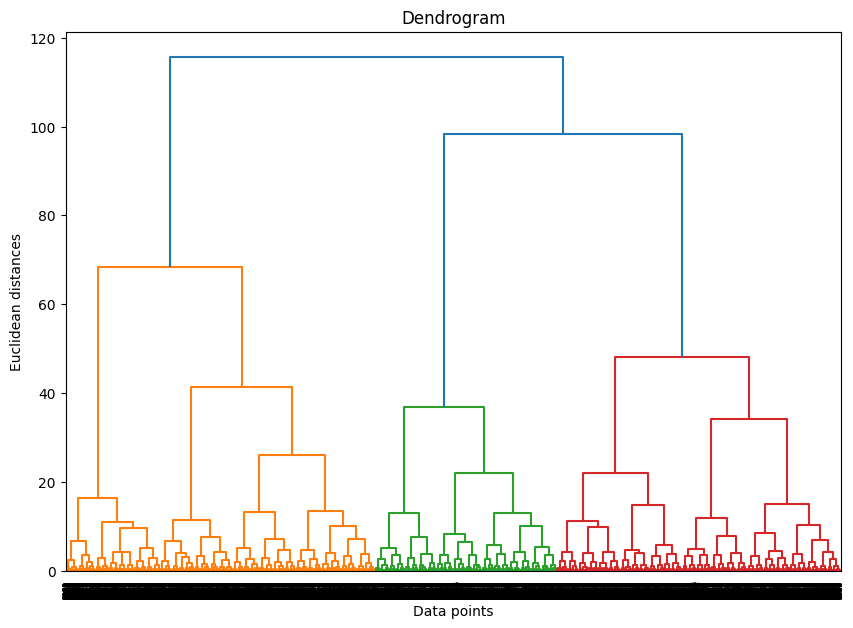

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram=sch.dendrogram(sch.linkage(ds_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

In [40]:
# Apply Hierarchical Clustering with the optimal number of clusters (e.g., 3)
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
clusters_hc=hc.fit_predict(ds_scaled)
# Add the cluster labels to the original dataframe
ds['Cluster_HC']=clusters_hc
# Display the first few rows with hierarchical cluster labels
print(ds.head())

  Transaction ID       Country  Amount (USD)  Transaction Type  \
0   TX0000000001        Brazil      0.537609                 2   
1   TX0000000002         China      1.729945                 4   
2   TX0000000003            UK     -1.690418                 4   
3   TX0000000004           UAE     -1.485226                 0   
4   TX0000000005  South Africa     -1.304815                 1   

  Date of Transaction Person Involved  Industry  Destination Country  \
0 2013-01-01 00:00:00     Person_1101         2                    9   
1 2013-01-01 01:00:00     Person_7484         4                    5   
2 2013-01-01 02:00:00     Person_3655         2                    6   
3 2013-01-01 03:00:00     Person_3226         5                    3   
4 2013-01-01 04:00:00     Person_7975         6                    9   

   Reported by Authority  Source of Money  Money Laundering Risk Score  \
0                   True                0                     0.163680   
1                  Fal

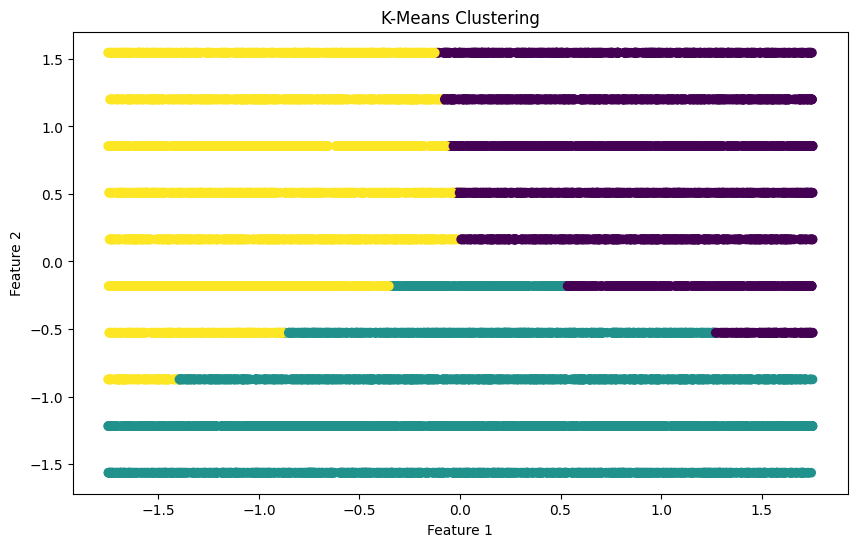

In [41]:
# Visualize K-Means Clusters
plt.figure(figsize=(10,6))
plt.scatter(ds_scaled[:,0],ds_scaled[:,1],c=clusters,cmap='viridis',marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

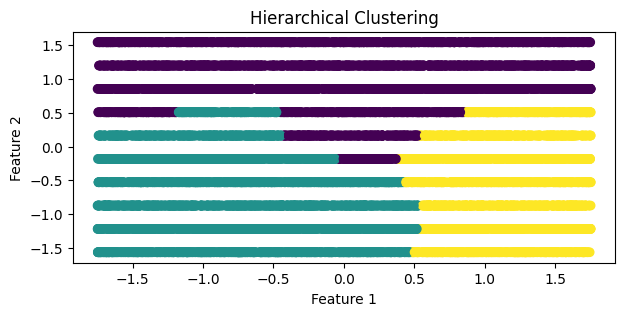

In [42]:
# Visualize Hierarchical Clusters
plt.figure(figsize=(7,3))
plt.scatter(ds_scaled[:,0],ds_scaled[:,1],c=clusters_hc,cmap='viridis',marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [43]:
print("Summary Statistics:\n",ds.describe())
fqy_dist=ds['Transaction Type'].value_counts()
print("\nFrequency Distribution:\n",fqy_dist)

Summary Statistics:
        Amount (USD)  Transaction Type  Date of Transaction      Industry  \
count  1.000000e+04      10000.000000                10000  10000.000000   
mean   1.712408e-16          2.012300  2013-07-28 07:30:00      3.007600   
min   -1.749490e+00          0.000000  2013-01-01 00:00:00      0.000000   
25%   -8.585399e-01          1.000000  2013-04-15 03:45:00      1.000000   
50%   -3.561493e-04          2.000000  2013-07-28 07:30:00      3.000000   
75%    8.569857e-01          3.000000  2013-11-09 11:15:00      5.000000   
max    1.753849e+00          4.000000  2014-02-21 15:00:00      6.000000   
std    1.000050e+00          1.410797                  NaN      1.990763   

       Destination Country  Source of Money  Money Laundering Risk Score  \
count         10000.000000     10000.000000                 1.000000e+04   
mean              4.520500         0.298300                 5.684342e-17   
min               0.000000         0.000000                -1.5643

In [51]:
matrix=ds.corr()
print(matrix)  #correlation statistics for multiple variables

ValueError: could not convert string to float: 'TX0000000001'

In [48]:
#cross tabulation between two categorical columns
cross_tab=pd.crosstab(ds['country'],ds['Transaction Type'])
print(cross_tab)

Transaction Type    0    1    2    3    4
country                                  
0                 195  170  190  185  220
1                 187  175  213  226  185
2                 193  207  218  203  211
3                 224  213  176  224  198
4                 184  189  210  213  203
5                 207  202  206  184  190
6                 192  204  173  210  208
7                 186  197  179  231  177
8                 219  192  197  181  192
9                 191  224  218  229  199


In [49]:
summary=ds.describe(include='all') #summary statistics for multiple variables
print(summary)

       Transaction ID Country  Amount (USD)  Transaction Type  \
count           10000   10000  1.000000e+04      10000.000000   
unique          10000      10           NaN               NaN   
top      TX0000000001   China           NaN               NaN   
freq                1    1038           NaN               NaN   
mean              NaN     NaN  1.712408e-16          2.012300   
min               NaN     NaN -1.749490e+00          0.000000   
25%               NaN     NaN -8.585399e-01          1.000000   
50%               NaN     NaN -3.561493e-04          2.000000   
75%               NaN     NaN  8.569857e-01          3.000000   
max               NaN     NaN  1.753849e+00          4.000000   
std               NaN     NaN  1.000050e+00          1.410797   

        Date of Transaction Person Involved      Industry  \
count                 10000           10000  10000.000000   
unique                  NaN            6320           NaN   
top                     NaN     Pers